# 케라스 CNN CIFAR 10

- 50,000개의 학습데이터, 10,000개의 테스트 데이터로 구성

- 데이터 복잡도가 MNIST보다 훨씬 높은 특징이 있음
  - 신경망이 특징을 검출하기 어려움

  <img src="https://www.researchgate.net/profile/Jean_Elsner/publication/329969195/figure/fig1/AS:708799606317059@1546002403551/Images-from-the-CIFAR-10-13-dataset-and-their-corresponding-classes-CIFAR-10.ppm">


### modules import

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import numpy as np

### 데이터 로드 및 전처리

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

print(x_train_full.shape, y_train_full.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
print(y_test[5])

[6]


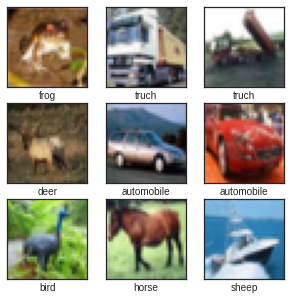

In [4]:
np.random.seed(777)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','sheep','truch']

sample_size=9
random_idx = np.random.randint(6000,size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train_full[i])
  plt.xlabel(class_names[int(y_train_full[i])])

plt.show()

In [5]:
x_mean = np.mean(x_train_full, axis=(0,1,2))
x_std = np.std(x_train_full, axis=(0,1,2))

x_train_full = (x_train_full - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full,y_train_full, test_size=0.3)

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)
(10000, 32, 32, 3)
(10000, 1)


### 모델 구성 및 컴파일


In [8]:
def model_build():
  model = Sequential()

  input = Input(shape=(32,32,3))
  output = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)

  output = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)

  output = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(output)
  output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)

  output = Flatten()(output)
  output = Dense(256, activation='relu')(output)
  output = Dense(128, activation='relu')(output)
  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input],outputs=output)

  model.compile(optimizer=Adam(learning_rate=1e-4),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model
  

  

In [9]:
model = model_build()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)        

### 모델 학습 및 평가
- [런타임]에서 GPU 설정


In [10]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size= 256,
                    validation_data=(x_val, y_val))

Epoch 1/30
137/137 [==============================] - 4s 26ms/step - loss: 1.8937 - accuracy: 0.3266 - val_loss: 1.6370 - val_accuracy: 0.4182
Epoch 2/30
137/137 [==============================] - 3s 22ms/step - loss: 1.5231 - accuracy: 0.4613 - val_loss: 1.4581 - val_accuracy: 0.4769
Epoch 3/30
137/137 [==============================] - 3s 22ms/step - loss: 1.3872 - accuracy: 0.5103 - val_loss: 1.3521 - val_accuracy: 0.5161
Epoch 4/30
137/137 [==============================] - 3s 22ms/step - loss: 1.3109 - accuracy: 0.5347 - val_loss: 1.2866 - val_accuracy: 0.5445
Epoch 5/30
137/137 [==============================] - 3s 22ms/step - loss: 1.2455 - accuracy: 0.5613 - val_loss: 1.2491 - val_accuracy: 0.5593
Epoch 6/30
137/137 [==============================] - 3s 22ms/step - loss: 1.1854 - accuracy: 0.5855 - val_loss: 1.2044 - val_accuracy: 0.5771
Epoch 7/30
137/137 [==============================] - 3s 22ms/step - loss: 1.1437 - accuracy: 0.5994 - val_loss: 1.1704 - val_accuracy: 0.5927

### 학습 과정 시각화

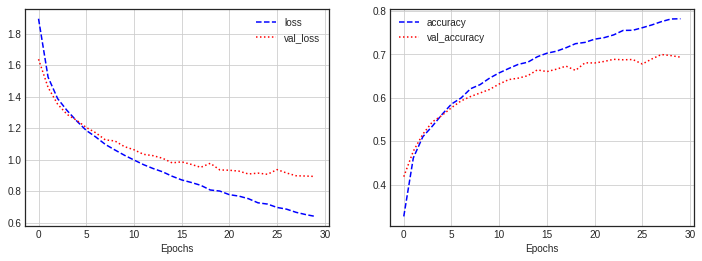

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b--',label='loss')
plt.plot(history.history['val_loss'],'r:',label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b--',label='accuracy')
plt.plot(history.history['val_accuracy'],'r:',label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()


- 해당 모델은 성능이 좋지 않음
- 규제화, 드롭아웃 등 과대적합을 방지하는 기술 필요

In [13]:
def model_build2():
  model = Sequential()

  input = Input(shape=(32,32,3))
  output = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)

  output = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(output)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)

  output = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(output)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2,2),strides=2,padding='same')(output)
  output = Dropout(0.5)(output)

  output = Flatten()(output)
  output = Dense(256, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(128, activation='relu')(output)
  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input],outputs=output)

  model.compile(optimizer=Adam(learning_rate=1e-4),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model
  
model2 = model_build2()
model2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

### 모델 학습 및 평가
- [런타임]에서 GPU 설정


In [14]:
history2 = model2.fit(x_train, y_train,
                    epochs=30,
                    batch_size= 256,
                    validation_data=(x_val, y_val))

Epoch 1/30
137/137 [==============================] - 4s 30ms/step - loss: 2.6147 - accuracy: 0.1885 - val_loss: 2.1321 - val_accuracy: 0.2276
Epoch 2/30
137/137 [==============================] - 4s 27ms/step - loss: 2.0051 - accuracy: 0.2773 - val_loss: 1.8359 - val_accuracy: 0.3458
Epoch 3/30
137/137 [==============================] - 4s 27ms/step - loss: 1.8562 - accuracy: 0.3223 - val_loss: 1.6502 - val_accuracy: 0.4187
Epoch 4/30
137/137 [==============================] - 4s 27ms/step - loss: 1.7475 - accuracy: 0.3619 - val_loss: 1.5490 - val_accuracy: 0.4519
Epoch 5/30
137/137 [==============================] - 4s 27ms/step - loss: 1.6797 - accuracy: 0.3841 - val_loss: 1.4954 - val_accuracy: 0.4694
Epoch 6/30
137/137 [==============================] - 4s 27ms/step - loss: 1.6148 - accuracy: 0.4072 - val_loss: 1.4479 - val_accuracy: 0.4925
Epoch 7/30
137/137 [==============================] - 4s 27ms/step - loss: 1.5585 - accuracy: 0.4284 - val_loss: 1.3933 - val_accuracy: 0.5071

### 학습 과정 시각화

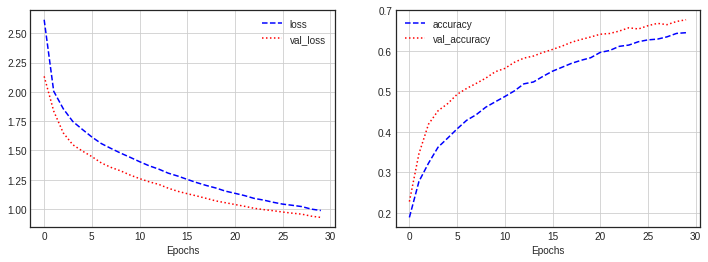

In [15]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history2.history['loss'],'b--',label='loss')
plt.plot(history2.history['val_loss'],'r:',label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(history2.history['accuracy'],'b--',label='accuracy')
plt.plot(history2.history['val_accuracy'],'r:',label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [16]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9162 - accuracy: 0.6792


[0.916203498840332, 0.6791999936103821]